In [23]:
import cv2
import pytesseract

img = cv2.imread('screen.png')
img = cv2.resize(img, None, fx=9, fy=9)  # Увеличение изображения в 9 раз

# Распознавание, допустимы только цифры

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


balance = pytesseract.image_to_string(img, config='outputbase digits')
print(balance)

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# скачиваем данные и разделяем на надор для обучения и тесовый
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

# 2. предварительная обработка 

num_classes = 10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# преобразование векторных классов в бинарные матрицы
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('Размерность x_train:', x_train.shape)
print(x_train.shape[0], 'Размер train')
print(x_test.shape[0], 'Размер test')



# 3. Создание модели

batch_size = 128
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


hist = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
print("Модель успешно обучена")

model.save('mnist.h5')
print("Модель сохранена как mnist1.h5")

(60000, 28, 28) (60000,)
Размерность x_train: (60000, 28, 28, 1)
60000 Размер train
10000 Размер test
Epoch 1/10
469/469 [==============================] - 70s 148ms/step - loss: 2.2833 - accuracy: 0.1539 - val_loss: 2.2299 - val_accuracy: 0.4298
Epoch 2/10
469/469 [==============================] - 71s 151ms/step - loss: 2.2228 - accuracy: 0.2880 - val_loss: 2.1475 - val_accuracy: 0.5875
Epoch 3/10
469/469 [==============================] - 72s 154ms/step - loss: 2.1437 - accuracy: 0.4070 - val_loss: 2.0330 - val_accuracy: 0.6665
Epoch 4/10
101/469 [=====>........................] - ETA: 56s - loss: 2.0563 - accuracy: 0.4890

In [18]:
# // https://pythonru.com/primery/raspoznavanie-rukopisnyh-cifr-na-p-ython-gui

from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np

model = load_model('mnist.h5')

def predict_digit(img):
    # изменение рзмера изобржений на 28x28
    img = img.resize((28,28))
    # конвертируем rgb в grayscale
    img = img.convert('L')
    img = np.array(img)
    # изменение размерности для поддержки модели ввода и нормализации
    img = img.reshape(1,28,28,1)
    img = img/255.0
    # предстказание цифры
    res = model.predict([img])[0]
    return np.argmax(res), max(res)
    
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        
        self.x = self.y = 0
        
        # Создание элементов
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Думаю..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Распознать", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Очистить", command = self.clear_all)
        
        # Сетка окна
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        
        # self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
        
    def clear_all(self):
        self.canvas.delete("all")
        
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() 
        rect = win32gui.GetWindowRect(HWND) # получаем координату холста
        im = ImageGrab.grab(rect)
        
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
        
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')


app = App()
mainloop()

In [6]:
import tkinter
tkinter._test()

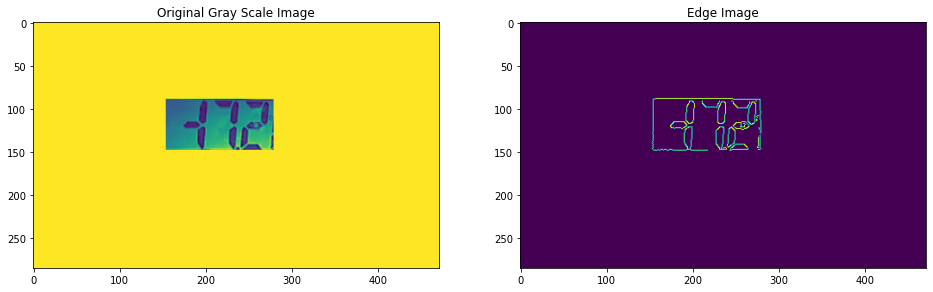

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Declaring the output graph's size
plt.figure(figsize=(16, 16))

# Convert image to grayscale
img_gs = cv2.imread('termo2.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('gs.jpg', img_gs)

# Apply canny edge detector algorithm on the image to find edges
edges = cv2.Canny(img_gs, 300,200)

# Plot the original image against the edges
plt.subplot(121), plt.imshow(img_gs)
plt.title('Original Gray Scale Image')
plt.subplot(122), plt.imshow(edges)
plt.title('Edge Image')

# Display the two images
plt.show()

In [16]:
from imageai.Classification.Custom import CustomImageClassification
import os

execution_path = os.getcwd()

prediction = CustomImageClassification()
prediction.setModelTypeAsResNet50()
prediction.setModelPath("idenprof_061-0.7933.h5")
prediction.setJsonPath("idenprof_model_class.json")
prediction.loadModel(num_objects=10)

predictions, probabilities = prediction.predictImage("image.jpg", result_count=3)

for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)

ModuleNotFoundError: No module named 'imageai'